# Prédiction des Prix de l'Immobilier avec Python 🏠

Dans ce projet, j’ai appliqué des techniques de Machine Learning avec Python pour prédire les prix immobiliers à partir de données historiques.

---

### 🧭 Processus suivi pour la prédiction des prix de l'immobilier

Voici les étapes clés que j’ai suivies pour construire un modèle de prédiction des prix dans le domaine immobilier :

1. **Collecte de données** : Rassembler des données pertinentes à partir de différentes sources (bases de données immobilières, archives publiques, annonces en ligne, etc.).
2. **Nettoyage et préparation des données** : Gérer les valeurs manquantes, supprimer les valeurs aberrantes, et transformer les variables catégorielles en variables numériques.
3. **Création de nouvelles variables** : Ajouter ou transformer des variables pour capturer des informations importantes susceptibles d’influencer les prix.
4. **Analyse exploratoire** : Visualiser et analyser les données pour comprendre leur structure, les corrélations et les tendances.
5. **Choix des modèles** : Sélectionner les algorithmes de Machine Learning les plus appropriés pour cette tâche.
6. **Entraînement du modèle** : Former le modèle sur les données d'entraînement et ajuster ses paramètres pour améliorer la précision des prédictions.

Pour réaliser cette tâche, j’ai utilisé un jeu de données contenant des caractéristiques influentes sur les prix es propriétés.


## 📥 Chargement des données

Nous allons maintenant charger les données et en afficher les premières lignes pour comprendre leur structure.


Pour commencer le projet de prédiction des prix immobiliers, j’ai d’abord importé les bibliothèques Python essentielles à l’analyse de données, puis chargé le jeu de données qui servira d’entrée pour l'entraînement du modèle.


In [12]:
import pandas as pd

# Charger le jeu de données
real_estate_data = pd.read_csv("C:/Users/AK/Desktop/Projets/Modèle de prédiction de prix immobiliers/Real_Estate.csv")

# Afficher les premières lignes du jeu de données et les informations sur celui-ci
real_estate_data_head = real_estate_data.head()
data_info = real_estate_data.info()

print(real_estate_data_head)
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144

Le jeu de données contient 7 colonnes. Voici une brève description de chaque variable :

- **Transaction date** : Date de la transaction immobilière.
- **House age** : Âge du bien immobilier en années.
- **Distance to the nearest MRT station** : Distance jusqu'à la station de métro la plus proche (en mètres).
- **Number of convenience stores** : Nombre de supérettes situées à proximité.
- **Latitude** : Latitude géographique de la propriété.
- **Longitude** : Longitude géographique de la propriété.
- **House price of unit area** : Prix du bien par unité de surface.

Voyons maintenant si le jeu de données contient des valeurs manquantes :


In [13]:
print(real_estate_data.isnull().sum())

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


L'ensemble de données ne contient aucune valeur nulle. Examinons maintenant les statistiques descriptives de l'ensemble de données :

In [14]:
# Statistiques descriptives du jeu de données
descriptive_stats = real_estate_data.describe()

print(descriptive_stats)

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

Maintenant, regardons les histogrammes de toutes les caractéristiques numériques :

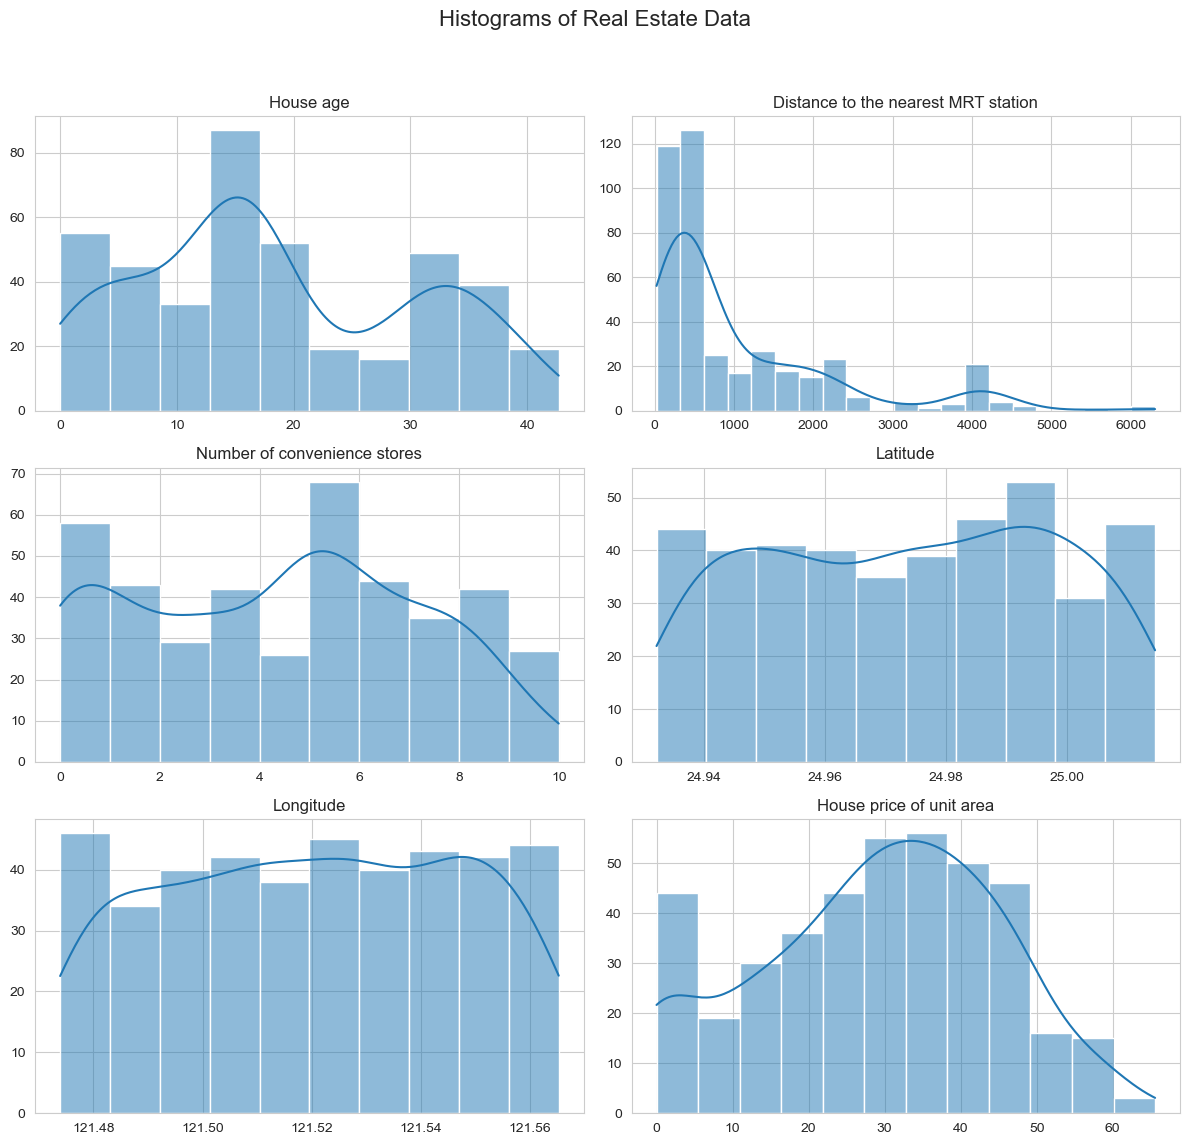

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le style esthétique des graphiques
sns.set_style("whitegrid")

# Créer des histogrammes pour les colonnes numériques
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Les histogrammes permettent de mieux comprendre la distribution de chaque variable :

- **House Age** : L’âge des propriétés semble relativement bien réparti, avec une légère prédominance de biens récents.
- **Distance to the Nearest MRT Station** : La majorité des biens sont situés à proximité d’une station de métro (faibles distances). Cependant, une queue longue vers la droite indique que certains biens sont très éloignés.
- **Number of Convenience Stores** : La distribution présente des pics marqués à des valeurs spécifiques comme 0, 5 et 10, ce qui suggère des configurations fréquentes autour de certaines valeurs.
- **Latitude et Longitude** : Les distributions sont concentrées, ce qui montre que les biens sont situés dans une zone géographique restreinte.
- **House Price of Unit Area** : La distribution est asymétrique vers la droite, indiquant une majorité de biens dans la gamme de prix inférieure, avec peu de biens à prix élevés.

---

🧮 Ensuite, je vais créer des nuages de points (*scatter plots*) afin d’explorer les relations entre les variables et le prix au mètre carré. Cela permettra d’identifier les facteurs ayant potentiellement une influence significative sur le prix des biens.


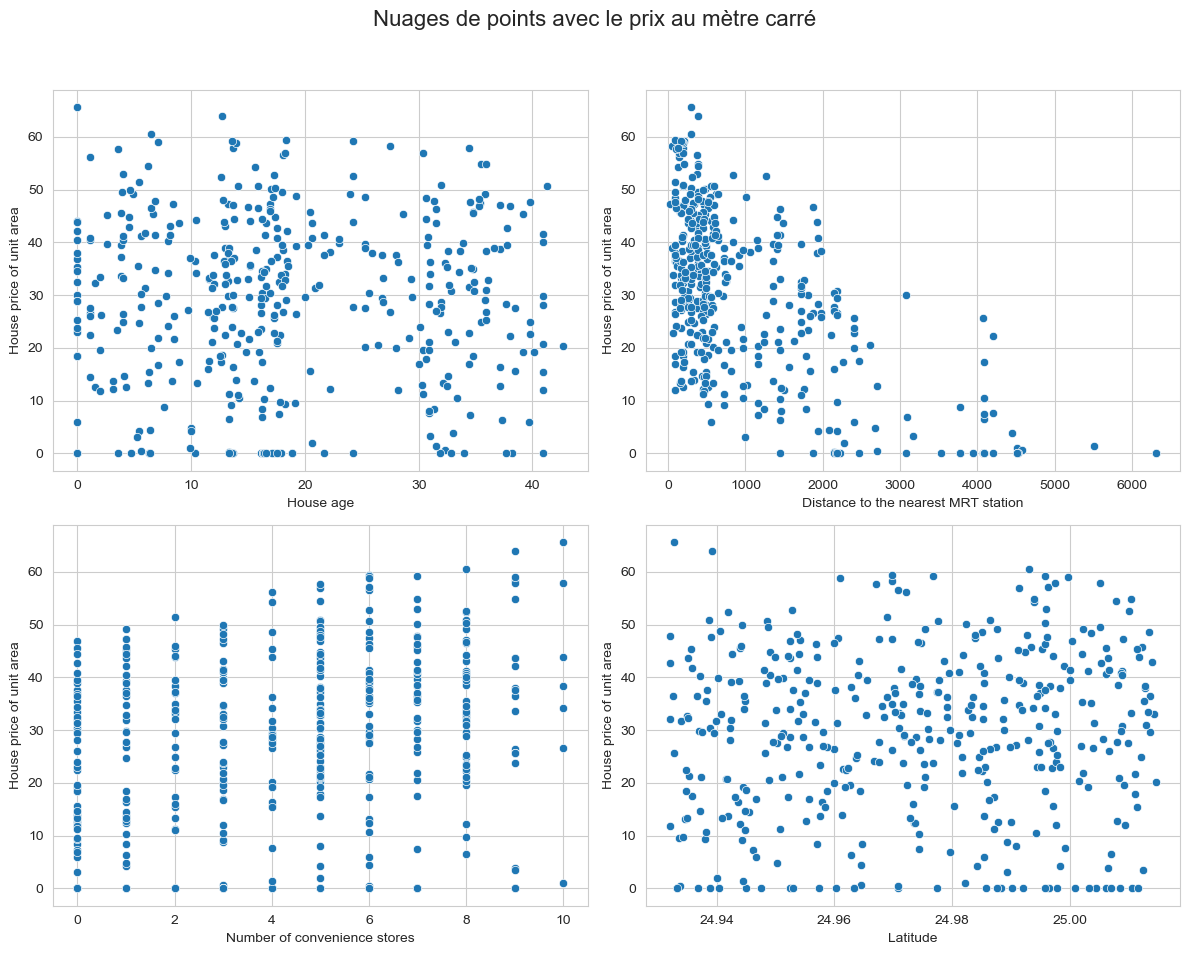

In [19]:
# Nuages de points pour observer la relation avec le prix au mètre carré
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Nuages de points avec le prix au mètre carré', fontsize=16)

# Nuage de points pour chaque variable par rapport au prix
sns.scatterplot(data=real_estate_data, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=real_estate_data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=real_estate_data, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Les nuages de points ont mis en évidence plusieurs relations intéressantes entre certaines variables et le prix immobilier :

- **Âge de la maison vs. Prix** : Il n’existe pas de relation linéaire claire. Toutefois, il semble que les maisons très récentes ou très anciennes aient tendance à afficher des prix plus élevés.
- **Distance à la station de MRT la plus proche vs. Prix** : Une tendance nette apparaît : plus la distance est grande, plus le prix diminue. Cela suggère une relation négative forte entre ces deux variables.
- **Nombre de supérettes vs. Prix** : On observe une relation positive. Les biens situés à proximité de plusieurs supérettes ont tendance à avoir un prix plus élevé.
- **Latitude vs. Prix** : Bien qu’il n’y ait pas de lien linéaire évident, certaines latitudes semblent associées à des niveaux de prix plus élevés, ce qui pourrait refléter la popularité de certains quartiers.

---

🧪 Pour approfondir l’analyse, j’ai calculé une matrice de corrélation afin de quantifier les relations entre toutes les variables, et en particulier avec le prix au mètre carré.


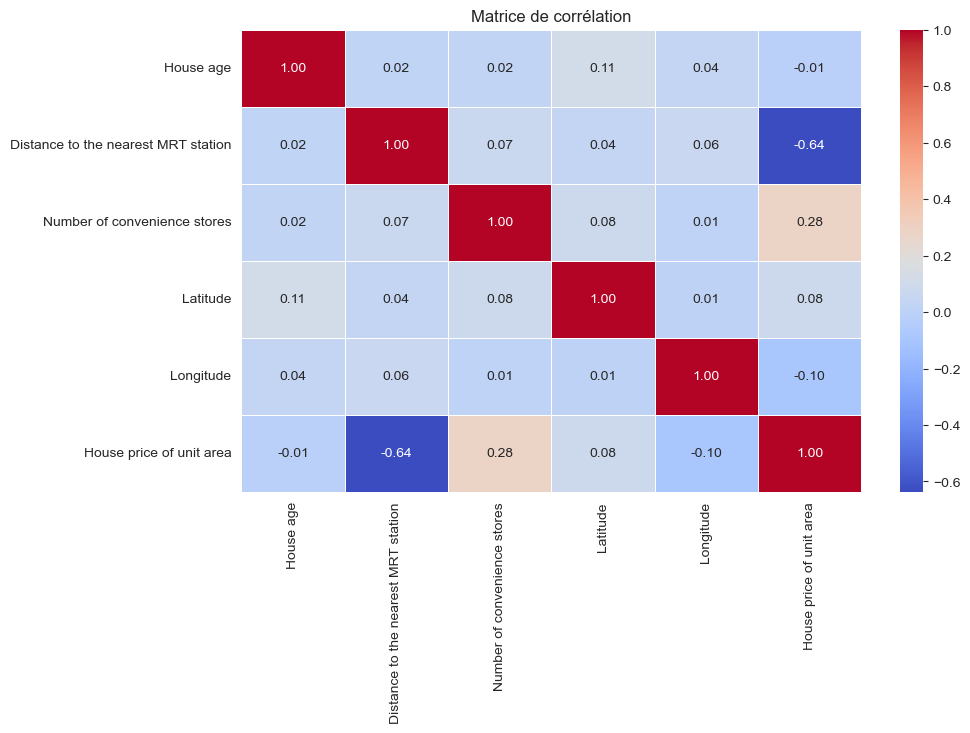

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [22]:
# Calculer la matrice de corrélation uniquement sur les colonnes numériques
correlation_matrix = real_estate_data.select_dtypes(include=['float64', 'int64']).corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation')
plt.show()

print(correlation_matrix)

La matrice de corrélation permet de quantifier les relations entre les variables, notamment par rapport au prix au mètre carré :

- **House Age** : Corrélation très faible et négative (-0.012) avec le prix. Cela suggère que l’âge du bien n’est pas un facteur déterminant dans ce jeu de données.
- **Distance à la station de MRT la plus proche** : Corrélation négative forte (-0.637) avec le prix. Plus une propriété est proche d’une station de métro, plus elle a tendance à être chère.
- **Nombre de supérettes** : Corrélation positive modérée (0.281). La présence de commerces de proximité semble avoir un effet positif sur le prix des biens.
- **Latitude et Longitude** : Faibles corrélations avec le prix. La latitude présente une légère corrélation positive (0.081), et la longitude une légère corrélation négative (-0.099).

✅ **Conclusion** : Les facteurs les plus influents sur le prix sont la proximité aux stations MRT et le nombre de supérettes aux alentours. L’emplacement géographique (latitude/longitude) et l’âge du bien ont un impact relativement faible.

---

### 🤖 Modélisation : Régression linéaire

Passons maintenant à la construction d’un modèle de régression pour prédire les prix immobiliers à l’aide de l’algorithme de **régression linéaire**.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sélection des variables explicatives et de la variable cible
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

# Division du jeu de données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)


LinearRegression()

Maintenant, visualisons les valeurs réelles par rapport aux valeurs prédites pour évaluer les performances de notre modèle :

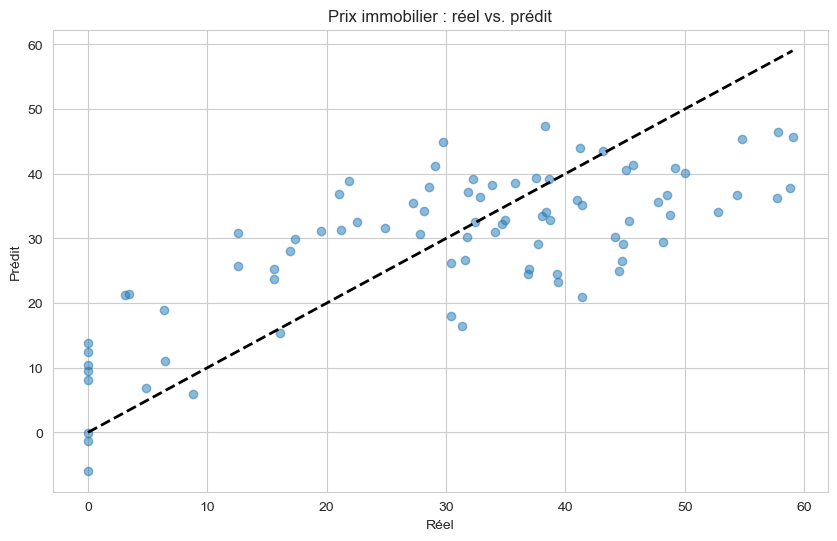

In [24]:
# Prédictions à l'aide du modèle de régression linéaire
y_pred_lr = model.predict(X_test)

# Visualisation : valeurs réelles vs. valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Réel')
plt.ylabel('Prédit')
plt.title('Prix immobilier : réel vs. prédit')
plt.show()

La ligne pointillée diagonale représente l’égalité parfaite entre les prix réels et les prix prédits. Plus un point est proche de cette ligne, plus la prédiction est précise.

- ✅ De nombreux points sont alignés près de cette diagonale, ce qui indique que le modèle réalise des prédictions globalement cohérentes pour une grande partie des données de test.
- ⚠️ Certains points sont cependant éloignés de la ligne, suggérant des erreurs plus importantes dans certaines prédictions, possiblement dues à des facteurs non pris en compte dans le modèle.

---

🎯 Ce projet montre ainsi comment prédire les prix de l’immobilier à l’aide de techniques de Machine Learning en Python, en combinant **analyse exploratoire**, **modélisation statistique**, et **évaluation visuelle et quantitative des performances**.


## 🖥️ Déploiement interactif avec Dash : créer une application web de prédiction

Pour transformer ce modèle de prédiction en une **solution interactive complète**, j’ai utilisé le framework **Dash**, développé par Plotly.

Dash permet de créer facilement des applications web dynamiques en Python, sans avoir besoin de connaissances en développement frontend. C’est un excellent outil pour présenter un modèle de Machine Learning de manière visuelle et exploitable.

➡️ Dans cette partie, je montre comment intégrer notre modèle de prédiction des prix immobiliers dans une interface web interactive, que l’on peut utiliser pour effectuer des prédictions en temps réel à partir des valeurs saisies par l’utilisateur.

In [26]:
!pip install dash

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 487.6 kB/s eta 0:00:17
   - -------------------------------------- 0.3/8.0 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/8.0 MB 4.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/8.0 MB 5.8 MB/s eta 0:00:02
   -------- ------------------------------- 1.7/8.0 MB 6.9 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/8.0 MB 7.4 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/8.0 MB 8.2 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.0 MB 8.6 MB/s eta 0:00:01
   -------------------- ------------------- 4.0/8.0 MB 9.1 MB/s eta 0:00:01
   ----------------------- ---------------- 4.6/8.0 MB 9.2 MB/s eta 0:00:01
   -------------------------- ------------- 5.3/8.0 MB 9.7 MB/s eta 0:00:01
   ---------------------

In [30]:
# Importation des bibliothèques nécessaires
import dash  # Framework principal
from dash import html, dcc, Input, Output, State  # Composants de Dash
import pandas as pd  # Pour manipuler les données en DataFrame

# Initialisation de l'application Dash
app = dash.Dash(__name__)

# Style global de la page (fond, police, marges)
main_style = {
    'fontFamily': 'Segoe UI, sans-serif',
    'backgroundColor': '#F5F7FA',
    'padding': '40px',
}

# Style de la "carte" contenant les éléments d'entrée et de sortie
card_style = {
    'backgroundColor': 'white',
    'boxShadow': '0 4px 12px rgba(0,0,0,0.1)',  # ombre portée
    'borderRadius': '16px',
    'padding': '30px',
    'maxWidth': '600px',
    'margin': '0 auto'  # centrer horizontalement
}

# Style des champs de saisie (inputs)
input_style = {
    'width': '90%',
    'padding': '12px',
    'margin': '12px 0',
    'borderRadius': '8px',
    'border': '1px solid #CCC',
    'fontSize': '16px'
}

# Style du bouton
button_style = {
    'width': '90%',
    'padding': '14px',
    'margin': '20px 0',
    'border': 'none',
    'borderRadius': '8px',
    'backgroundColor': '#007BFF',
    'color': 'white',
    'fontSize': '16px',
    'cursor': 'pointer'
}

# Définition de l'interface utilisateur (layout)
app.layout = html.Div([
    html.Div([
        # Titre principal
        html.H1("🏘️ Prédiction du Prix Immobilier", style={'textAlign': 'center', 'color': '#333'}),
        
        # Carte contenant les champs de saisie
        html.Div([
            # Champs pour saisir les données d'entrée
            dcc.Input(id='distance_to_mrt', type='number', placeholder="Distance jusqu’à la station MRT (m)",
                      style=input_style),
            dcc.Input(id='num_convenience_stores', type='number', placeholder="Nombre de supérettes à proximité",
                      style=input_style),
            dcc.Input(id='latitude', type='number', placeholder="Latitude", style=input_style),
            dcc.Input(id='longitude', type='number', placeholder="Longitude", style=input_style),

            # Bouton de prédiction
            html.Button('🔍 Prédire le prix', id='predict_button', n_clicks=0, style=button_style),

            # Zone d'affichage du résultat
            html.Div(id='prediction_output',
                     style={'textAlign': 'center', 'fontSize': '20px', 'marginTop': '20px', 'color': '#333'})
        ], style=card_style)
    ])
], style=main_style)

# Callback permettant de générer une prédiction lorsque l'utilisateur clique sur le bouton
@app.callback(
    Output('prediction_output', 'children'),  # Ce qui sera affiché
    [Input('predict_button', 'n_clicks')],     # Déclencheur : clic sur le bouton
    [State('distance_to_mrt', 'value'),        # États : valeurs saisies dans les champs
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value')]
)
def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude):
    # Si le bouton est cliqué et que toutes les valeurs sont renseignées
    if n_clicks > 0 and all(v is not None for v in [distance_to_mrt, num_convenience_stores, latitude, longitude]):
        # Préparation des données sous forme de DataFrame
        features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]], 
                                columns=['distance_to_mrt', 'num_convenience_stores', 'latitude', 'longitude'])
        # Prédiction du modèle (attention : la variable "model" doit être préalablement définie)
        prediction = model.predict(features)[0]
        # Retour du résultat formaté
        return f"💰 Prix estimé par m² : {prediction:.2f}"
    elif n_clicks > 0:
        return "⚠️ Veuillez remplir tous les champs."
    return ""  # Ne rien afficher tant que le bouton n’a pas été cliqué

# Lancement de l'application Dash
if __name__ == '__main__':
    app.run(debug=True)

🧠 Voilà donc comment construire un modèle de Machine Learning de bout en bout en utilisant Python.
